<a href="https://colab.research.google.com/github/manishhr/stroke_prediction/blob/main/Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
  
  
uploaded = files.upload()


Saving healthcare-dataset-stroke-data (1).csv to healthcare-dataset-stroke-data (1) (1).csv


In [ ]:
import numpy as np  
import pandas as pd
raw_data = pd.read_csv('/content/healthcare-dataset-stroke-data (1).csv')
raw_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
raw_data = raw_data.dropna(axis=0).reset_index(drop=True)
raw_data = raw_data.drop(raw_data[raw_data['gender'] == 'Other'].index , axis=0).reset_index(drop=True)


In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
data_pre = raw_data.copy()
le = LabelEncoder()
data_pre['gender'] = le.fit_transform(data_pre['gender'])
data_pre['ever_married'] = le.fit_transform(data_pre['ever_married'])
data_pre['work_type'] = le.fit_transform(data_pre['work_type'])
data_pre['Residence_type'] = le.fit_transform(data_pre['Residence_type'])
data_pre['smoking_status'] = le.fit_transform(data_pre['smoking_status'])
x1 = data_pre[['hypertension', 'smoking_status', 'heart_disease', 'bmi', 'avg_glucose_level']] 
y = data_pre['stroke']
x1_const = sm.add_constant(x1)

smote= SMOTE()
x1_train, x1_test, y_train, y_test = train_test_split(x1_const, y, test_size=0.2)
x1_trainsm, y_trainsm = smote.fit_resample(x1_train, y_train)
reg=linear_model.LogisticRegression()
result=reg.fit(x1_trainsm,y_trainsm)
table_predict = pd.DataFrame()
table_predict['actual'] = y_test
table_predict['predict'] = np.round(result.predict(x1_test))
cm = confusion_matrix(table_predict['actual'], table_predict['predict'])
print(cm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[[710 235]
 [ 22  15]]


In [ ]:
cm = confusion_matrix(table_predict['actual'], table_predict['predict'])
cm


array([[710, 235],
       [ 22,  15]])

In [ ]:
accuracy = accuracy_score(table_predict['actual'], table_predict['predict'])
accuracy


0.7382892057026477

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
cm = confusion_matrix(table_predict['actual'], table_predict['predict'])
print(cm)

precision = precision_score(table_predict['actual'], table_predict['predict'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(table_predict['actual'], table_predict['predict'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(table_predict['actual'], table_predict['predict'])
print('F1 score: %f' % f1)

[[710 235]
 [ 22  15]]
Precision: 0.060000
Recall: 0.405405
F1 score: 0.104530


In [ ]:
print('Accuracy The Model :', np.round(accuracy, 2) * 100, '%')

Accuracy The Model : 74.0 %


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.scatter(table_predict['actual'], table_predict['predict'], c = 'crimson')


p1 = max(max(table_predict['predict']), max(table_predict['actual']))
p2 = min(min(table_predict['predict']), min(table_predict['actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob=result.predict_proba(x1_test)
yb_probs=y_prob[:,1]
r_auc=roc_auc_score(y_test,yb_probs)
r_fpr,r_tpr,_=roc_curve(y_test,yb_probs,pos_label=1)

Text(0, 0.5, 'true positive rate')

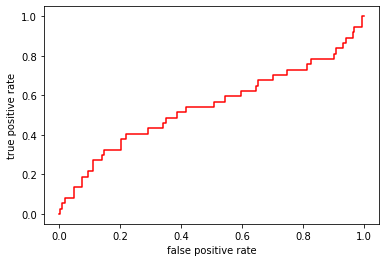

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr,r_tpr,color="red")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")